# This is the start of the complete unsupervised notebook with PID

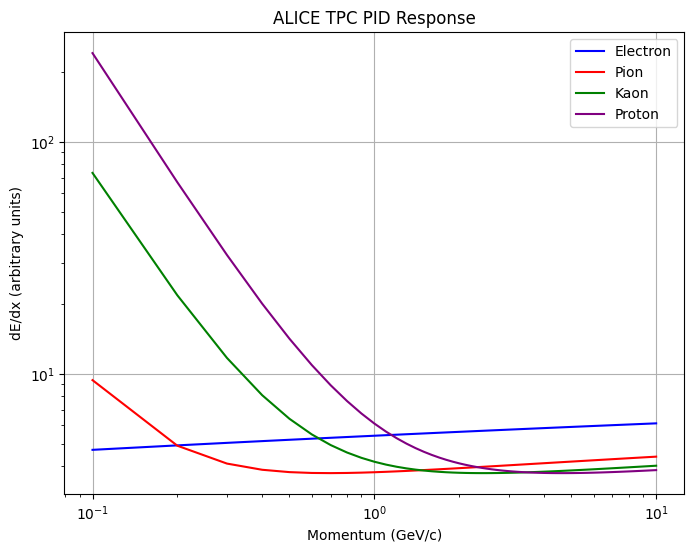

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = (K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)
    
    return dEdx

def tpc_pid_response(momentum, particle_type):
    """
    Provides a parametrized TPC PID response for different particle types.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass)
    
    return dEdx

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses for different particle species
electron_response = tpc_pid_response(momentum_range, 'electron')
pion_response = tpc_pid_response(momentum_range, 'pion')
kaon_response = tpc_pid_response(momentum_range, 'kaon')
proton_response = tpc_pid_response(momentum_range, 'proton')

# Plot the responses
plt.figure(figsize=(8, 6))
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.plot(momentum_range, proton_response, label='Proton', color='purple')

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response')
plt.legend()
plt.grid(True)
plt.show()


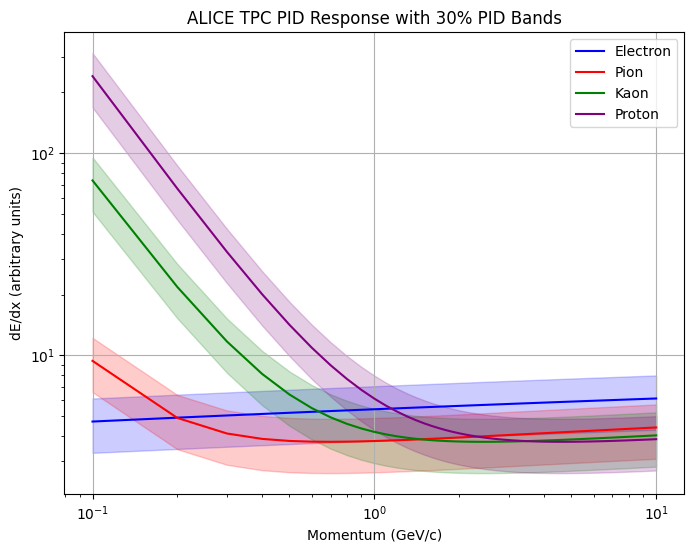

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = (K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)
    
    return dEdx

def tpc_pid_response(momentum, particle_type):
    """
    Provides a parametrized TPC PID response for different particle types with a 30% PID band.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    - lower_band: Lower bound of PID band (70% of dE/dx)
    - upper_band: Upper bound of PID band (130% of dE/dx)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass)
    
    # Calculate the PID band (30% width)
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses and PID bands for different particle species
electron_response, electron_lower, electron_upper = tpc_pid_response(momentum_range, 'electron')
pion_response, pion_lower, pion_upper = tpc_pid_response(momentum_range, 'pion')
kaon_response, kaon_lower, kaon_upper = tpc_pid_response(momentum_range, 'kaon')
proton_response, proton_lower, proton_upper = tpc_pid_response(momentum_range, 'proton')

# Plot the responses with PID bands
plt.figure(figsize=(8, 6))

# Electron
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.fill_between(momentum_range, electron_lower, electron_upper, color='blue', alpha=0.2)

# Pion
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.fill_between(momentum_range, pion_lower, pion_upper, color='red', alpha=0.2)

# Kaon
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.fill_between(momentum_range, kaon_lower, kaon_upper, color='green', alpha=0.2)

# Proton
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.fill_between(momentum_range, proton_lower, proton_upper, color='purple', alpha=0.2)

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response with 30% PID Bands')
plt.legend()
plt.grid(True)
plt.show()


